In [1]:
import json
import os
import sys
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%load_ext autoreload

%autoreload 2


In [2]:
import end_to_end_profiles as e2e
import profiler
import single_model_profiles as sm_profs

In [3]:
pipeline_three_df = profiler.load_pipeline_three_systemx()

No profile found for alexnet: 1 gpus, 1 cpus, batch size 30. Approximating with batch size 32.0
No profile found for res50: 1 gpus, 1 cpus, batch size 30. Approximating with batch size 32.0
No profile found for alexnet: 1 gpus, 1 cpus, batch size 30. Approximating with batch size 32.0
No profile found for res50: 1 gpus, 1 cpus, batch size 30. Approximating with batch size 32.0
No profile found for alexnet: 1 gpus, 1 cpus, batch size 30. Approximating with batch size 32.0
No profile found for res50: 1 gpus, 1 cpus, batch size 30. Approximating with batch size 32.0
No profile found for alexnet: 1 gpus, 1 cpus, batch size 30. Approximating with batch size 32.0
No profile found for res50: 1 gpus, 1 cpus, batch size 30. Approximating with batch size 32.0
No profile found for alexnet: 1 gpus, 1 cpus, batch size 30. Approximating with batch size 32.0
No profile found for res50: 1 gpus, 1 cpus, batch size 30. Approximating with batch size 32.0
No profile found for alexnet: 1 gpus, 1 cpus, batc

In [4]:
pipeline_one_df = profiler.load_pipeline_one_systemx()

No profile found for tf-resnet-feats: 1 gpus, 1 cpus, batch size 64. Approximating with batch size 62.38461538461539
No profile found for tf-resnet-feats: 1 gpus, 1 cpus, batch size 64. Approximating with batch size 62.38461538461539
No profile found for tf-resnet-feats: 1 gpus, 1 cpus, batch size 64. Approximating with batch size 62.38461538461539
No profile found for tf-resnet-feats: 1 gpus, 1 cpus, batch size 64. Approximating with batch size 62.38461538461539
No profile found for tf-resnet-feats: 1 gpus, 1 cpus, batch size 64. Approximating with batch size 62.38461538461539
No profile found for tf-resnet-feats: 1 gpus, 1 cpus, batch size 64. Approximating with batch size 62.38461538461539
No profile found for tf-resnet-feats: 1 gpus, 1 cpus, batch size 64. Approximating with batch size 62.38461538461539
No profile found for tf-resnet-feats: 1 gpus, 1 cpus, batch size 64. Approximating with batch size 62.38461538461539
No profile found for tf-kernel-svm: 0 gpus, 1 cpus, batch size 1

In [15]:
def plot_pipeline_exp(pipeline):
    plt.clf()
    fig, (ax_thru, ax_lat) = plt.subplots(ncols=2, nrows=1)
    fig.set_size_inches(12,8)
    colors = sns.color_palette(n_colors=8)
    i = 0
    for title, group in pipeline.groupby("name"):
        box = ax_lat.boxplot(x=group["latency"], labels=group["cost"], patch_artist=True)
        for patch in box["boxes"]:
            patch.set_facecolor(colors[i])
#         ax_lat.plot(x=group["cost"], y=group["estimated_latency"], linestyle="dashed", color=colors[i])
        ax_thru.scatter(x=group["cost"], y=group["mean_throughput"], c=colors[i], marker="o", label=title)
        ax_thru.scatter(x=group["cost"], y=group["estimated_thru"], c=colors[i], marker="o", label="")

        i += 1
    ax_lat.set_ylabel("Latency (s)")
    ax_lat.set_xlabel("Cost ($/hr)")
    ax_thru.set_ylabel("Throughput (queries/s)")
    ax_thru.set_xlabel("Cost ($/hr)")
    ax_thru.legend(loc=2)


    plt.show()

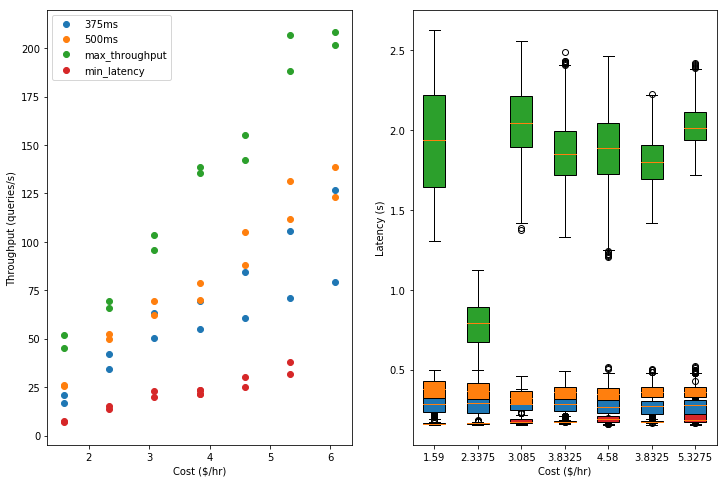

In [16]:
plot_pipeline_exp(pipeline_one_df)

In [ ]:
plot_pipeline_exp(pipeline_one_df)

In [18]:
pipeline_one_df

,name,mean_throughput,estimated_thru,p99_latency,p95_latency,estimated_latency,cost,latency
0,375ms,16.737902,21.095586,0.359794,0.348370,0.342122,1.5900,"[0.285565, 0.205302, 0.341708, 0.282018, 0.324..."
1,375ms,34.195283,42.191173,0.366489,0.358112,0.342122,2.3375,"[0.215835, 0.201095, 0.335133, 0.364763, 0.306..."
2,375ms,50.466090,63.286759,0.362790,0.350773,0.342122,3.0850,"[0.249805, 0.183143, 0.248921, 0.22867, 0.2487..."
3,375ms,60.547956,84.382345,0.368364,0.350546,0.342122,4.5800,"[0.303041, 0.327872, 0.331895, 0.365095, 0.315..."
4,375ms,54.935798,69.366341,0.354988,0.343530,0.342122,3.8325,"[0.282336, 0.264385, 0.227878, 0.24623, 0.2270..."
5,375ms,71.192964,105.477932,0.358759,0.339845,0.342122,5.3275,"[0.201397, 0.187477, 0.347317, 0.333644, 0.362..."
6,375ms,79.438263,126.573518,0.367609,0.343872,0.342122,6.0750,"[0.319268, 0.280962, 0.293911, 0.306837, 0.269..."
0,500ms,25.539010,26.281247,0.487155,0.472209,0.410758,1.5900,"[0.331289, 0.409878, 0.375783, 0.468961, 0.407..."
1,500ms,50.066721,52.562494,0.483020,0.464893,0.410758,2.3375,"[0.349733, 0.36984, 0.329935, 0.299173, 0.3193..."
2,500ms,62.193386,69.366341,0.423909,0.405055,0.410758,3.0850,"[0.283282, 0.333023, 0.304248, 0.274416, 0.260..."


In [ ]:
pipeline_three_df

In [ ]:
single_model_profs = sm_profs.load_single_model_profiles()

In [ ]:

incept_prof = single_model_profs["inception"]
incept_prof[incept_pro

In [17]:
pipeline_three_df

,name,mean_throughput,estimated_thru,p99_latency,p95_latency,estimated_latency,cost,latency
0,max_thru,97.768728,108.112152,1.701321,1.488131,1.120656,2.2425,"[1.018285, 0.721968, 0.926071, 0.84452, 0.8139..."
1,max_thru,113.694371,123.701150,0.915799,0.818349,1.120656,2.9900,"[0.622251, 0.525845, 0.693161, 0.701989, 0.613..."
2,max_thru,179.265030,207.758120,1.284528,1.143185,1.120656,3.7375,"[0.246114, 0.23537, 0.157773, 0.491017, 0.5473..."
3,max_thru,198.976145,216.224304,1.983239,1.666201,1.120656,4.4850,"[1.704993, 1.725201, 1.483675, 1.612796, 1.592..."
4,max_thru,208.562891,247.402300,1.176260,1.008316,1.120656,5.2325,"[0.347621, 0.367169, 0.328863, 0.42506, 0.3868..."
5,max_thru,303.203825,324.336456,1.997320,1.782837,1.120656,5.9800,"[0.528573, 0.59685, 1.420439, 1.460059, 1.5127..."
0,min_lat,43.142385,51.739444,0.553647,0.343892,0.083057,2.2425,"[0.01593, 0.152008, 0.039349, 0.131485, 0.0399..."
1,min_lat,56.604757,60.648571,0.211026,0.152273,0.083057,2.9900,"[0.048815, 0.051563, 0.108017, 0.105071, 0.015..."
2,min_lat,78.752082,84.740708,0.260658,0.196191,0.083057,3.7375,"[0.126065, 0.129236, 0.043377, 0.112062, 0.116..."
3,min_lat,82.023126,103.478887,0.325445,0.218063,0.083057,4.4850,"[0.0153, 0.040776, 0.128598, 0.125517, 0.04164..."
